# road count (mean) ssa

(can not separate weekly season)

In [18]:
library(ggplot2)
library(viridis)
library(zoo)
library(Rssa)

In [2]:
plot.wcor <- function(w, pallete="viridis") {
    stopifnot(pallete %in% c("viridis", "magma", "plasma", "inferno", "cividis"))
    my_melt <- function(x) {
      row_names <- rep(rownames(x), ncol(x))
      col_names <- unlist(lapply(colnames(x), function(cn) rep(cn, nrow(x))))
      melt_vals <- as.vector(x) # R does this in column order.
      data.frame(row=row_names, col=col_names, val=melt_vals)
    }              
    w <- my_melt(w)
    groups <- 1:nrow(w)
    g <- ggplot(w, aes(x=factor(row, levels=paste0("F", groups)), 
                       y=factor(col, levels=paste0("F", groups))))
    g <- g + geom_tile(aes(fill=val), colour="#000000", size=0.1, show.legend=F)
    g <- g + scale_fill_viridis(option=pallete)
    g + theme(axis.text.x = element_text(angle = 90, hjust = 1))
}

In [19]:
x <- read.csv("../data/highways_england/all_london/count_mean_2016-2018.csv")
#x <- head(x, -31)
tail(x, 31)

,X,X0,X1,X2,X3,X4,X5,X6,X7,X8,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
867,2018-09-23,255.80,236.99,221.12,195.94,175.76,153.57,134.85,123.41,111.25,⋯,480.48,423.05,366.88,341.35,313.03,283.49,235.70,218.02,187.45,153.53
868,2018-09-24,125.88,108.49,99.48,90.95,82.58,77.30,71.73,69.31,64.67,⋯,277.32,244.51,218.55,212.98,192.66,174.93,156.04,140.15,122.23,107.08
869,2018-09-25,100.71,93.69,87.58,79.00,67.19,60.18,57.44,49.90,44.78,⋯,283.02,266.13,260.54,239.06,221.57,187.28,167.83,151.81,137.82,118.42
870,2018-09-26,107.33,97.61,87.42,79.09,71.18,63.79,58.74,52.98,50.48,⋯,308.68,279.47,268.07,247.77,217.84,204.02,183.50,162.91,139.98,118.04
871,2018-09-27,110.41,99.91,90.41,83.65,74.90,63.00,55.96,50.91,48.73,⋯,344.83,311.22,289.67,251.68,211.97,190.60,179.37,170.68,155.33,130.13
872,2018-09-28,110.94,98.30,90.61,81.70,74.30,71.13,70.15,64.41,60.35,⋯,395.84,348.43,340.47,319.97,284.62,252.71,227.75,206.90,198.25,180.15
873,2018-09-29,154.11,132.64,118.99,106.90,99.65,95.47,87.60,83.52,76.78,⋯,382.62,353.12,333.51,324.36,321.56,300.55,290.21,280.03,266.45,250.45
874,2018-09-30,233.76,212.93,184.36,158.34,142.57,123.24,108.76,103.69,100.22,⋯,486.95,444.62,403.65,363.63,308.84,263.75,231.83,197.77,178.20,165.20
875,2018-10-01,135.99,114.71,104.85,89.28,79.29,70.82,66.35,59.46,54.33,⋯,262.05,242.11,222.59,204.77,182.76,163.53,146.87,130.56,112.50,95.72
876,2018-10-04,108.83,95.72,83.27,72.73,68.73,62.57,52.15,46.69,45.77,⋯,322.26,296.53,270.69,246.93,232.27,210.13,187.97,172.56,148.65,126.80


In [20]:
# lots of missing days
date.range <- as.character(seq(from=as.Date("2016-01-01"), to=as.Date("2018-10-31"), by=1))
date.range[!date.range %in% x$X]

[1] "2016-03-16" "2016-03-27" "2016-04-06" "2016-04-07" "2016-04-08"
  [6] "2016-04-09" "2016-04-10" "2016-04-11" "2016-05-05" "2016-05-06"
 [11] "2016-05-07" "2016-05-08" "2016-05-09" "2016-05-10" "2016-05-11"
 [16] "2016-05-13" "2016-05-14" "2016-05-15" "2016-05-19" "2016-06-01"
 [21] "2016-06-02" "2016-06-08" "2016-06-09" "2016-06-14" "2016-06-16"
 [26] "2016-07-18" "2016-07-20" "2016-07-21" "2016-08-01" "2016-08-10"
 [31] "2016-08-15" "2016-08-16" "2016-08-17" "2016-08-18" "2016-08-19"
 [36] "2016-09-04" "2016-09-05" "2016-09-06" "2016-09-07" "2016-09-08"
 [41] "2016-09-15" "2016-09-16" "2016-10-07" "2016-10-08" "2016-10-10"
 [46] "2016-10-11" "2016-10-17" "2016-10-18" "2016-10-19" "2016-10-31"
 [51] "2016-11-21" "2016-11-29" "2016-12-06" "2016-12-14" "2016-12-15"
 [56] "2016-12-16" "2016-12-17" "2016-12-18" "2016-12-19" "2016-12-20"
 [61] "2017-01-03" "2017-01-04" "2017-01-05" "2017-01-21" "2017-02-14"
 [66] "2017-03-08" "2017-03-11" "2017-03-26" "2017-03-30" "2017-03-31"
 [71] "2017-04-07" "2017-04-11" "2017-05-04" "2017-05-12" "2017-05-13"
 [76] "2017-05-14" "2017-05-15" "2017-05-17" "2017-05-18" "2017-05-19"
 [81] "2017-05-20" "2017-05-21" "2017-05-22" "2017-05-23" "2017-05-26"
 [86] "2017-05-27" "2017-07-02" "2017-07-06" "2017-07-07" "2017-07-08"
 [91] "2017-07-09" "2017-07-10" "2017-07-13" "2017-07-14" "2017-07-15"
 [96] "2017-07-16" "2017-07-17" "2017-07-18" "2017-07-19" "2017-07-21"
[101] "2017-07-22" "2017-07-23" "2017-07-24" "2017-07-28" "2017-07-29"
[106] "2017-07-30" "2017-07-31" "2017-08-07" "2017-08-08" "2017-08-15"
[111] "2017-08-16" "2017-08-24" "2017-10-17" "2017-11-16" "2017-11-23"
[116] "2017-11-24" "2017-11-25" "2018-01-12" "2018-02-23" "2018-03-25"
[121] "2018-04-09" "2018-04-10" "2018-05-09" "2018-06-24" "2018-06-25"
[126] "2018-08-12" "2018-08-13" "2018-08-14" "2018-08-30" "2018-09-05"
[131] "2018-10-02" "2018-10-03" "2018-10-07" "2018-10-08" "2018-10-14"
[136] "2018-10-15" "2018-10-16" "2018-10-17"

In [21]:
lala <- merge(x, data.frame(d=date.range), by.x="X", by.y="d", all.y=T)
lala$X <- as.Date(as.character(lala$X))
lala <- lala[order(lala$X), ]
lala <- cbind(dow=weekdays(lala$X), lala)
lala[lala$X == "2018-10-02", ]
lala[lala$X == "2018-10-04", ]
nrow(lala)

,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
1028,Tuesday,2018-10-02,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
876,Thursday,2018-10-04,108.83,95.72,83.27,72.73,68.73,62.57,52.15,46.69,⋯,322.26,296.53,270.69,246.93,232.27,210.13,187.97,172.56,148.65,126.8


[1] 1035

In [22]:
meh <- data.frame()
for(weekday in unique(lala$dow)) {
    lala.wd <- lala[lala$dow == weekday, ]
    lala.wd <- apply(lala.wd, 2, na.locf)
    meh <- rbind(meh, lala.wd)
}
meh$X <- as.Date(as.character(meh$X))
lala <- meh[order(meh$X), ]
tail(lala)

,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
892,Friday,2018-10-26,117.65,103.84,90.12,79.60,69.34,60.85,54.43,49.69,⋯,431.77,399.91,373.29,345.21,318.25,298.81,279.86,255.46,223.17,194.12
893,Saturday,2018-10-27,166.49,145.11,124.96,110.55,100.55,91.47,80.90,67.83,⋯,378.78,343.42,356.02,374.71,338.82,322.08,309.48,288.68,276.16,252.41
894,Sunday,2018-10-28,222.16,196.10,174.41,157.07,139.06,126.89,111.33,81.08,⋯,486.88,452.15,415.32,382.51,331.37,276.60,246.37,218.33,190.79,161.26
895,Monday,2018-10-29,132.73,113.65,98.12,84.09,75.91,65.32,58.17,52.71,⋯,278.95,248.97,240.05,234.54,213.50,188.04,160.73,146.49,124.28,107.97
896,Tuesday,2018-10-30,95.09,84.70,73.88,62.40,50.65,48.06,40.54,35.95,⋯,284.47,258.93,245.98,237.57,206.88,171.73,149.59,136.73,123.08,109.43
897,Wednesday,2018-10-31,96.08,86.45,74.04,59.11,51.34,44.00,35.77,33.13,⋯,285.42,266.74,250.53,254.75,240.72,220.00,194.23,171.71,148.94,128.51


In [23]:
lala[lala$X == "2018-10-02", ]
lala[lala$X == "2018-10-04", ]

,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
1028,Tuesday,2018-10-02,100.71,93.69,87.58,79.00,67.19,60.18,57.44,49.90,⋯,283.02,266.13,260.54,239.06,221.57,187.28,167.83,151.81,137.82,118.42


,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
876,Thursday,2018-10-04,108.83,95.72,83.27,72.73,68.73,62.57,52.15,46.69,⋯,322.26,296.53,270.69,246.93,232.27,210.13,187.97,172.56,148.65,126.80


In [24]:
flatten <- function(df) as.vector(matrix(t(df[, -c(1, 2)]), ncol=1))

In [25]:
tail(lala, 10)

,dow,X,X0,X1,X2,X3,X4,X5,X6,X7,⋯,X86,X87,X88,X89,X90,X91,X92,X93,X94,X95
888,Monday,2018-10-22,138.75,117.50,100.48,87.59,76.91,63.44,59.06,55.58,⋯,299.88,260.79,246.11,231.96,213.79,192.08,163.27,150.93,130.32,106.90
889,Tuesday,2018-10-23,94.41,86.54,77.34,67.52,59.98,56.20,49.79,44.09,⋯,302.87,278.89,268.79,268.34,244.26,213.49,170.09,157.10,142.49,123.77
890,Wednesday,2018-10-24,107.93,95.90,83.91,72.50,61.72,53.50,48.03,44.16,⋯,334.97,304.19,284.75,261.02,220.83,200.41,180.37,171.09,155.90,128.82
891,Thursday,2018-10-25,109.84,99.30,92.65,82.48,72.76,63.26,53.08,46.96,⋯,370.67,333.82,311.39,287.55,256.21,225.13,195.88,165.93,146.56,132.42
892,Friday,2018-10-26,117.65,103.84,90.12,79.60,69.34,60.85,54.43,49.69,⋯,431.77,399.91,373.29,345.21,318.25,298.81,279.86,255.46,223.17,194.12
893,Saturday,2018-10-27,166.49,145.11,124.96,110.55,100.55,91.47,80.90,67.83,⋯,378.78,343.42,356.02,374.71,338.82,322.08,309.48,288.68,276.16,252.41
894,Sunday,2018-10-28,222.16,196.10,174.41,157.07,139.06,126.89,111.33,81.08,⋯,486.88,452.15,415.32,382.51,331.37,276.60,246.37,218.33,190.79,161.26
895,Monday,2018-10-29,132.73,113.65,98.12,84.09,75.91,65.32,58.17,52.71,⋯,278.95,248.97,240.05,234.54,213.50,188.04,160.73,146.49,124.28,107.97
896,Tuesday,2018-10-30,95.09,84.70,73.88,62.40,50.65,48.06,40.54,35.95,⋯,284.47,258.93,245.98,237.57,206.88,171.73,149.59,136.73,123.08,109.43
897,Wednesday,2018-10-31,96.08,86.45,74.04,59.11,51.34,44.00,35.77,33.13,⋯,285.42,266.74,250.53,254.75,240.72,220.00,194.23,171.71,148.94,128.51


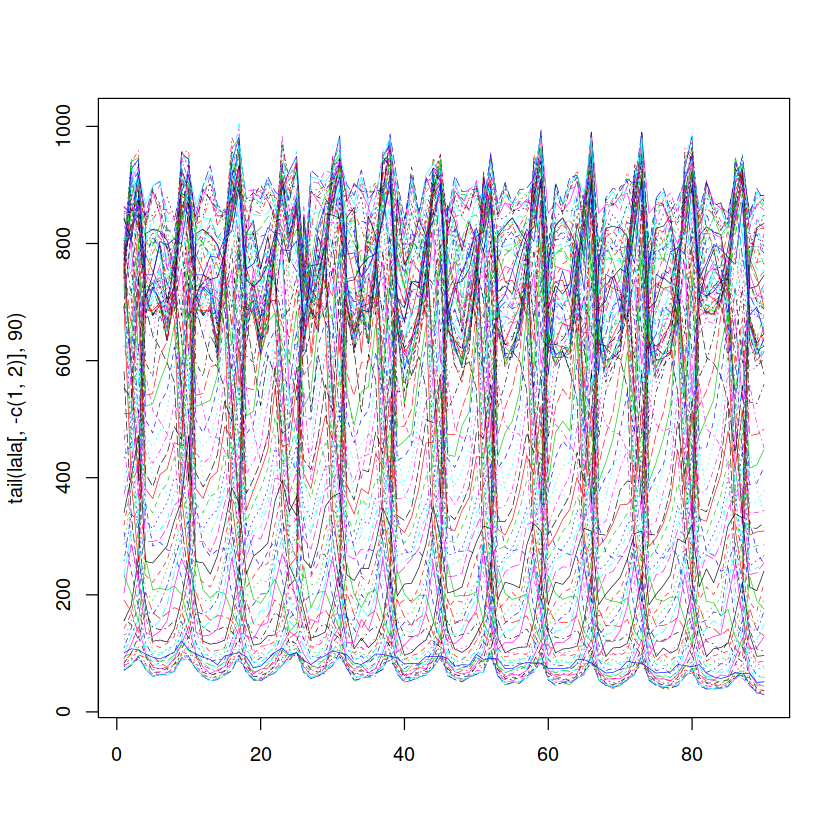

In [26]:
par(bg="white")
matplot(tail(lala[, -c(1,2)], 90), type="l", lwd=0.5)

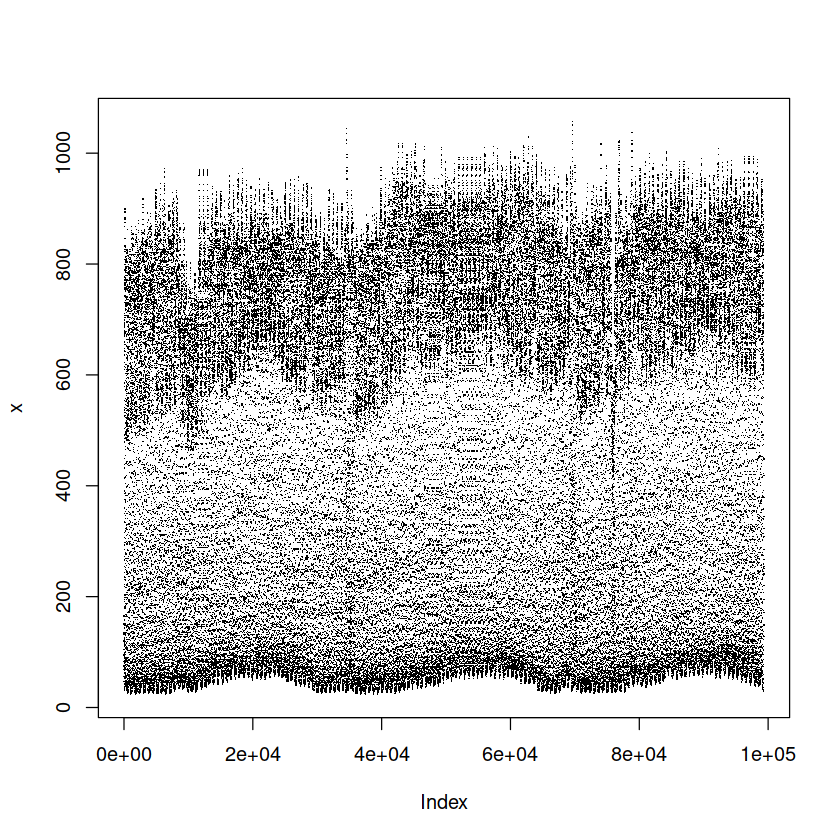

In [27]:
x <- as.numeric(flatten(lala))
#x <- as.vector(apply(lala[, -c(1,2)], 1, function(x) mean(as.numeric(x))))
#x <- head(x, -96*50)
plot(x, type="p", pch=".")

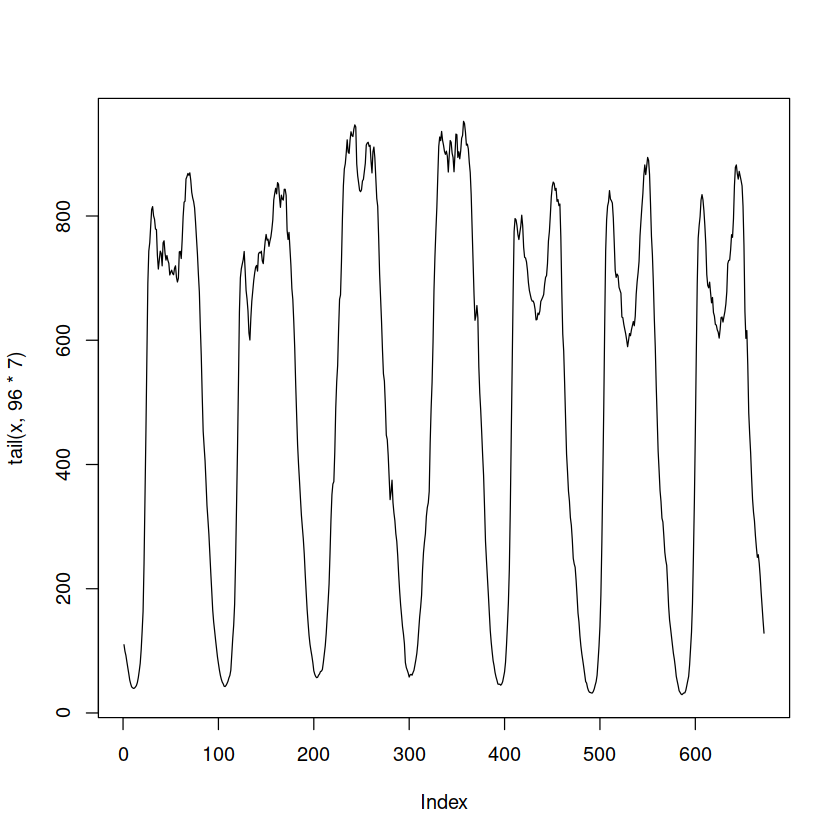

In [28]:
plot(tail(x, 96*7), type="l")

In [29]:
#m <- ssa(x, L=96*365)
m <- ssa(x)
m


Call:
ssa(x = x)

Series length: 99360,	Window length: 49680,	SVD method: nutrlan
Special triples:  0

Computed:
Eigenvalues: 50,	Eigenvectors: 50,	Factor vectors: 0

Precached: 0 elementary series (0 MiB)

Overall memory consumption (estimate): 19.71 MiB

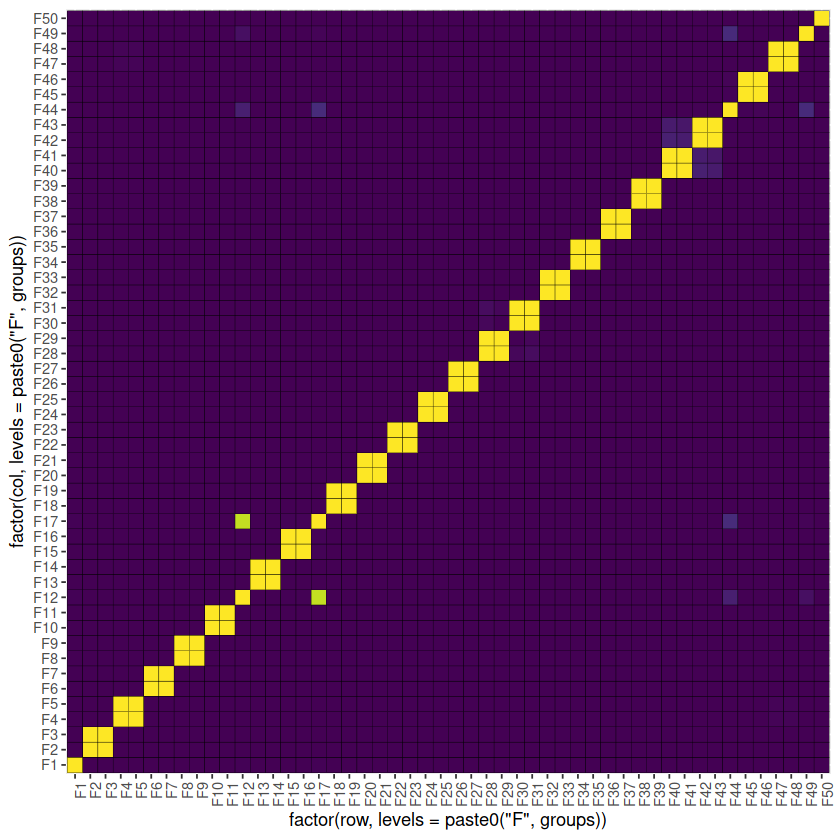

In [30]:
plot.wcor(wcor(m))

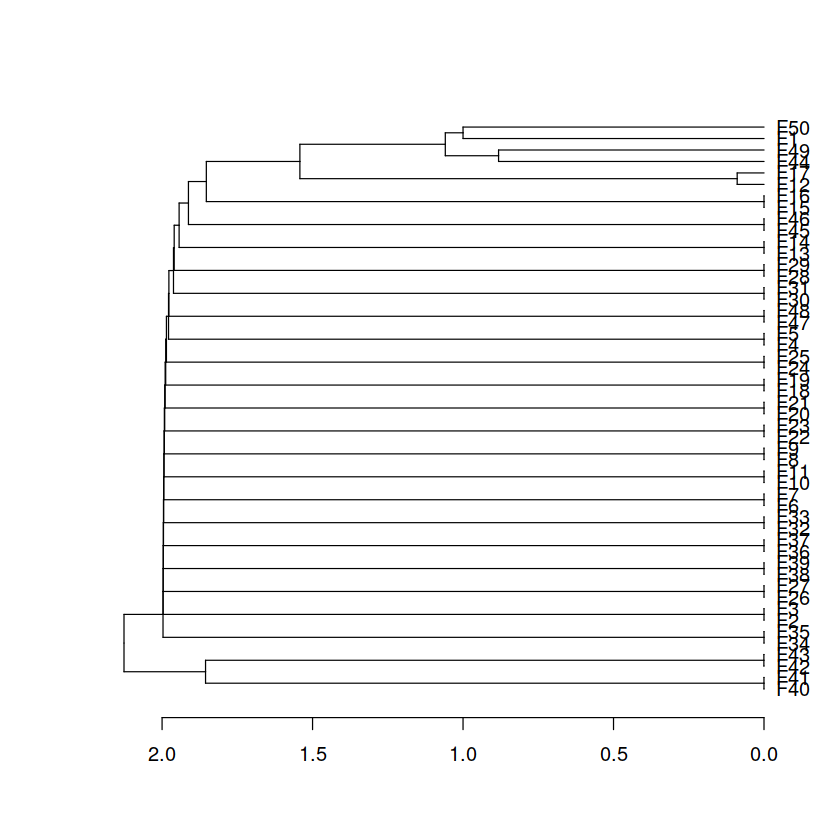

In [31]:
wc <- wcor(m)
wc <- wc[1:50, 1:50]
plot(as.dendrogram(hclust(1 - as.dist(wc), method="ward.D")), horiz=T)

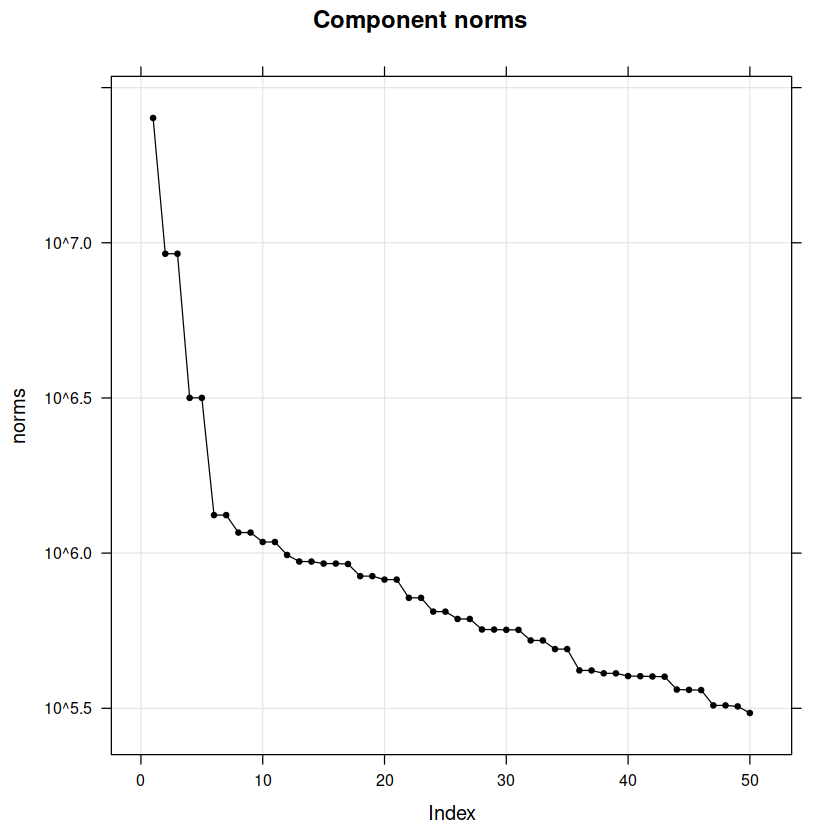

In [32]:
plot(m, type="values", col="black")

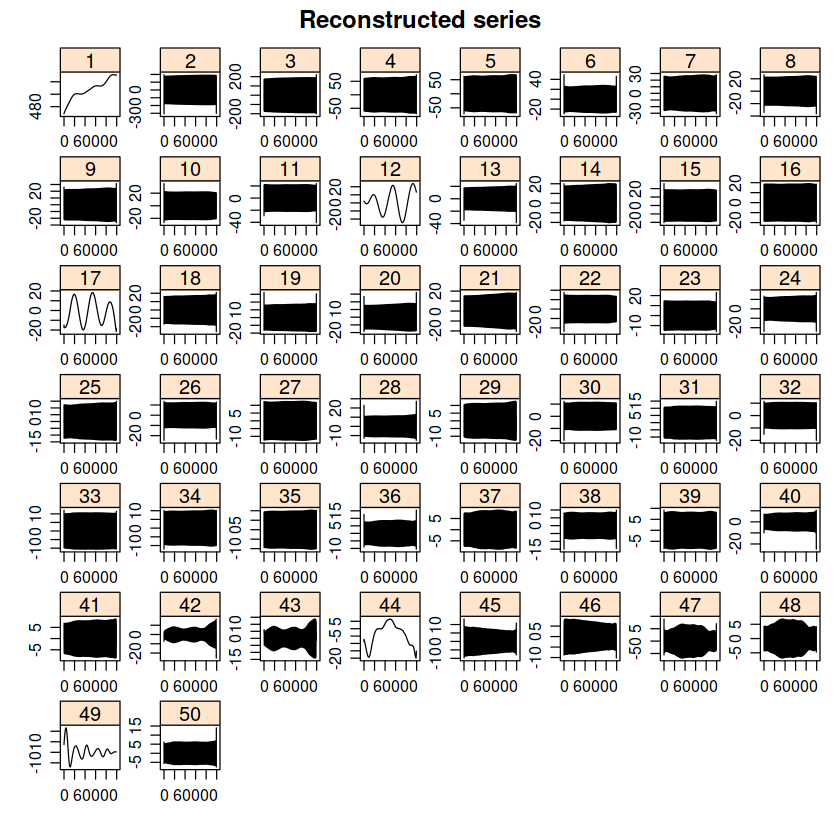

In [34]:
plot(m, type = "series", idx=1:50, col="black")

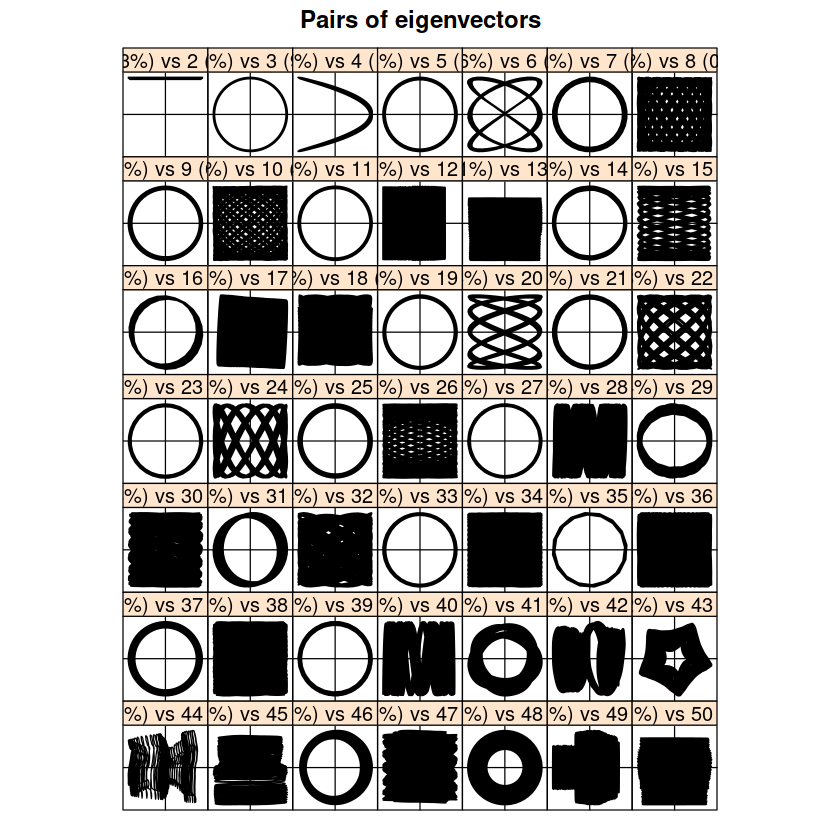

In [35]:
plot(m, type = "paired", col="black", idx=1:49)

In [64]:
recon <- reconstruct(m, groups = list("Trend" = c(1, 12, 17), "p1" = c(2, 3), "p2" = c(4, 5), "p3" = c(6, 7), "p4" = c(8, 9), "p5" = c(10, 11), "p6" = c(13,14), "p7" = c(15, 16), "p8" = c(18, 19), "p9" = c(20, 21),"p10" = c(22, 23) ,"p11" = c(24, 25), "p12" = c(26, 27),"p13" = c(28,29),"p14" = c(30, 31), "p15" = c(32, 33), "p15" = c(34, 35), "p16" = c(36, 37), "p17" = c(38, 39)))

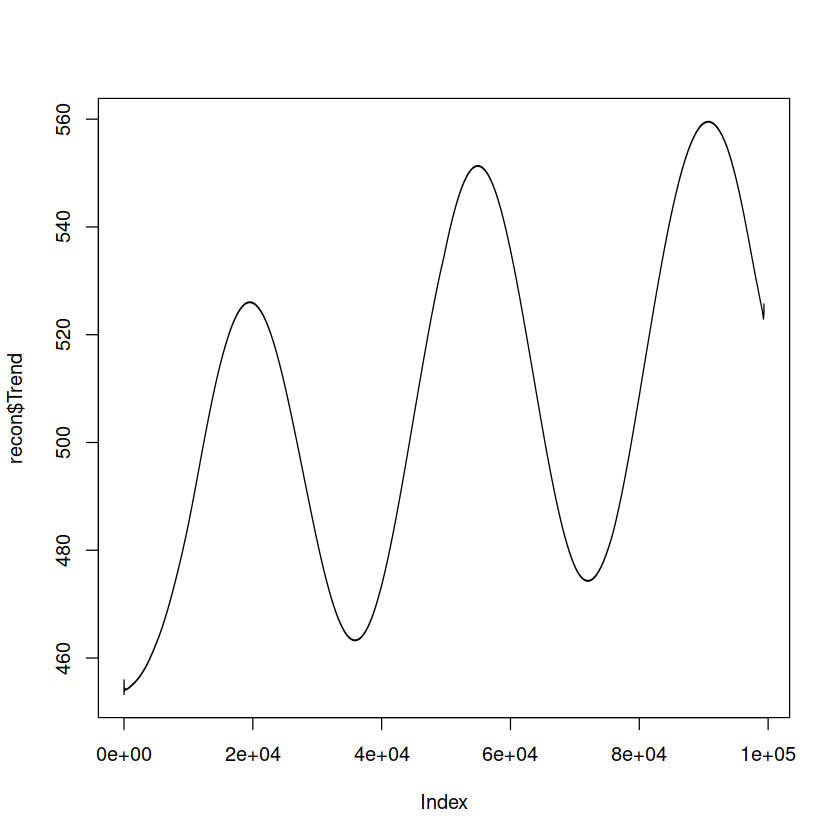

In [65]:
# trend has mixed in summer peak (good). probably not seperable because of drop at end and right in the middle.
plot(recon$Trend, type="l")

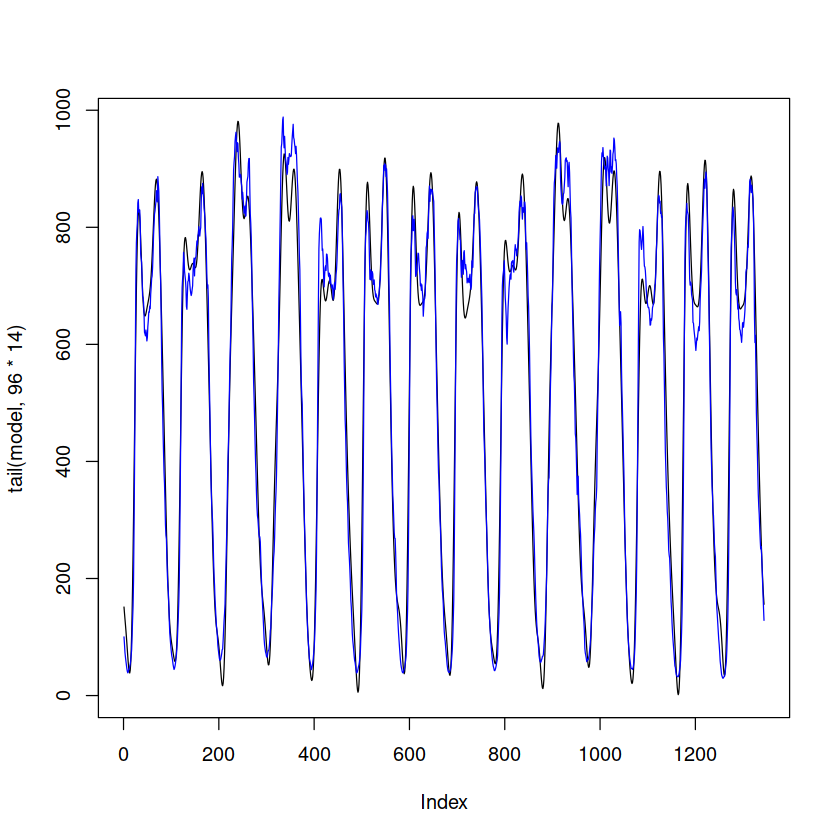

In [66]:
model <- with(recon, Trend+p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14+p15+p16+p17)
#model <- with(recon, Trend+p15)
plot(tail(model, 96*14), type="l")
lines(tail(x, 96*14), col="blue")

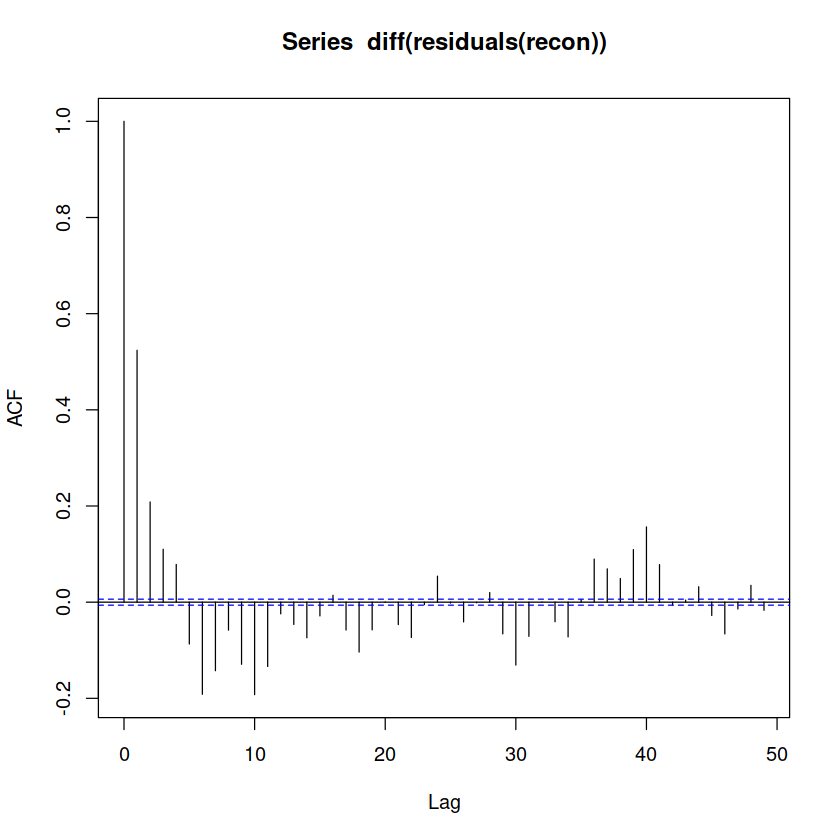

In [67]:
acf(diff(residuals(recon)))

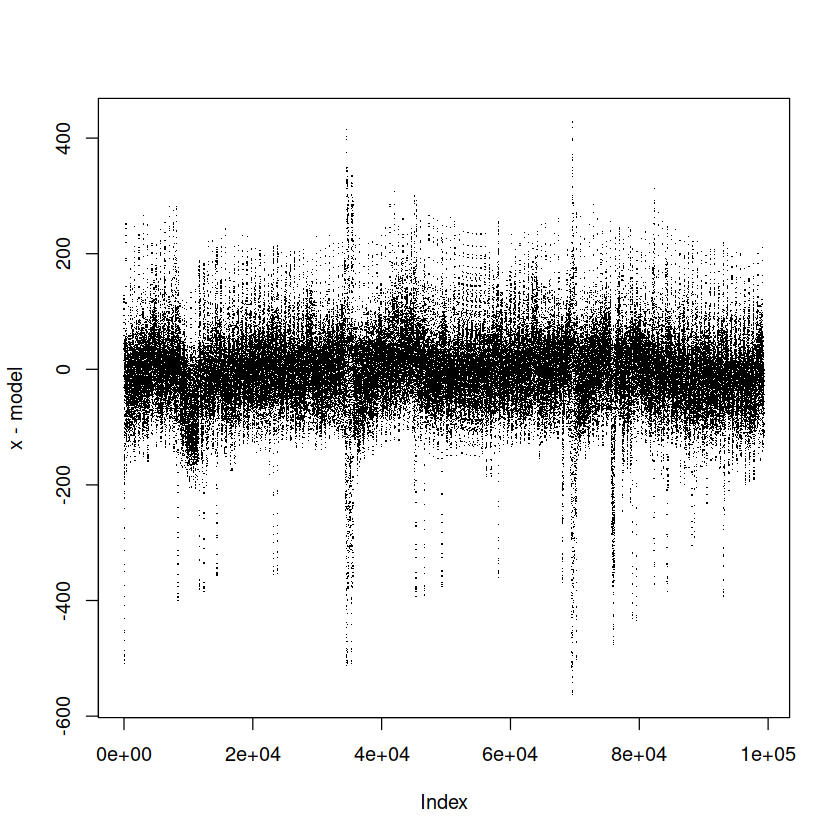

In [68]:
plot(x - model, type="p", pch=".")

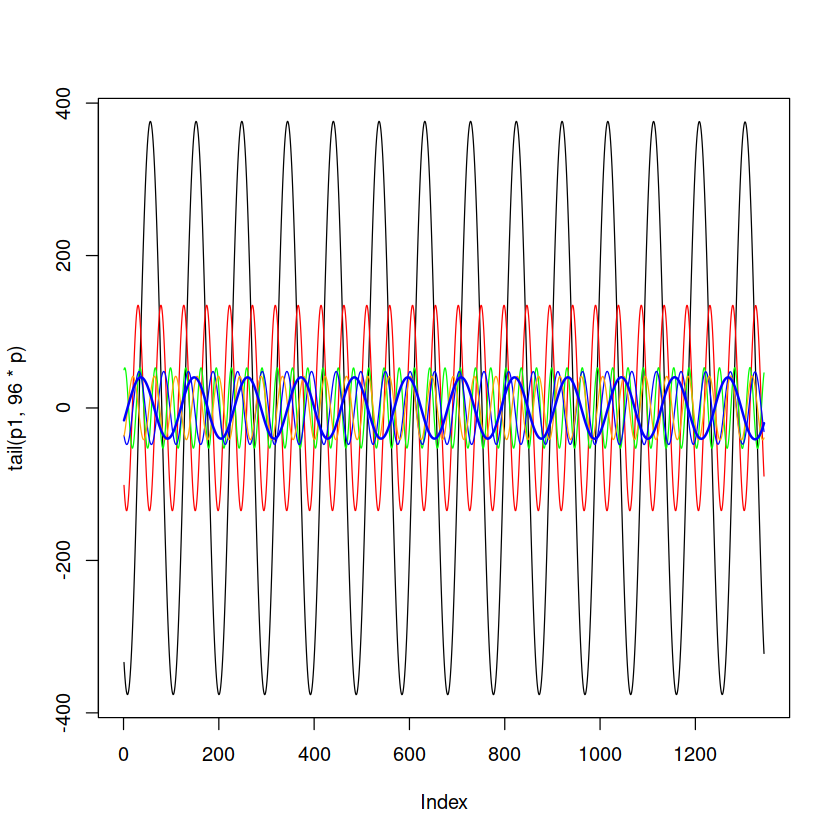

In [70]:
p <- 14
with(recon, {
  plot(tail(p1, 96*p), type="l")
  lines(tail(p2, 96*p), type="l", col="red")
  lines(tail(p3, 96*p), type="l", col="green")
  lines(tail(p4, 96*p), type="l", col="blue")
  lines(tail(p5, 96*p), type="l", col="orange")
  lines(tail(p6, 96*p), type="l", col="blue", lwd=2)
})

In [71]:
days <- seq.Date(as.Date("2016-01-01", tz="UTC"), as.Date("2018-10-31", tz="UTC"), "1 day")
dates <- rep(days, each=96)
intervals <- rep(1:96, length(days))
day <- factor(weekdays(dates), levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
msm <- rep(1:96 * 15, length(days))
month <- factor(months(dates), levels=c("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))
x.fixed <- data.frame(date=dates, day=day, month=month, interval=intervals, msm=msm, count_mean=x)
tail(x.fixed)

,date,day,month,interval,msm,count_mean
99355,2018-10-31,Wednesday,October,91,1365,240.72
99356,2018-10-31,Wednesday,October,92,1380,220.00
99357,2018-10-31,Wednesday,October,93,1395,194.23
99358,2018-10-31,Wednesday,October,94,1410,171.71
99359,2018-10-31,Wednesday,October,95,1425,148.94
99360,2018-10-31,Wednesday,October,96,1440,128.51


In [73]:
# seasonal adjustment (trend + winter/summer cycle + inter-week) - winter season now gone
x.fixed$sa <- x.fixed$count_mean - (recon$Trend)
# model
x.fixed$model <- with(recon, Trend+p1+p2+p3+p4+p5+p6+p7+p8+p9+p10+p11+p12+p13+p14+p15+p16+p17)
# parts of model
x.fixed$trend <- recon$Trend # just the trend
tail(x.fixed, 20)

,date,day,month,interval,msm,count_mean,sa,model,trend
99341,2018-10-31,Wednesday,October,77,1155,603.05,79.48493,714.7914,523.5651
99342,2018-10-31,Wednesday,October,78,1170,615.54,91.85842,677.4589,523.6816
99343,2018-10-31,Wednesday,October,79,1185,559.35,35.51372,639.2576,523.8363
99344,2018-10-31,Wednesday,October,80,1200,483.02,-41.00500,600.8055,524.0250
99345,2018-10-31,Wednesday,October,81,1215,448.44,-75.80156,562.5916,524.2416
99346,2018-10-31,Wednesday,October,82,1230,418.53,-105.94755,524.9761,524.4775
99347,2018-10-31,Wednesday,October,83,1245,378.87,-145.85283,488.2133,524.7228
99348,2018-10-31,Wednesday,October,84,1260,344.07,-180.89614,452.4828,524.9661
99349,2018-10-31,Wednesday,October,85,1275,323.20,-201.99547,417.9205,525.1955
99350,2018-10-31,Wednesday,October,86,1290,309.10,-216.29852,384.6492,525.3985


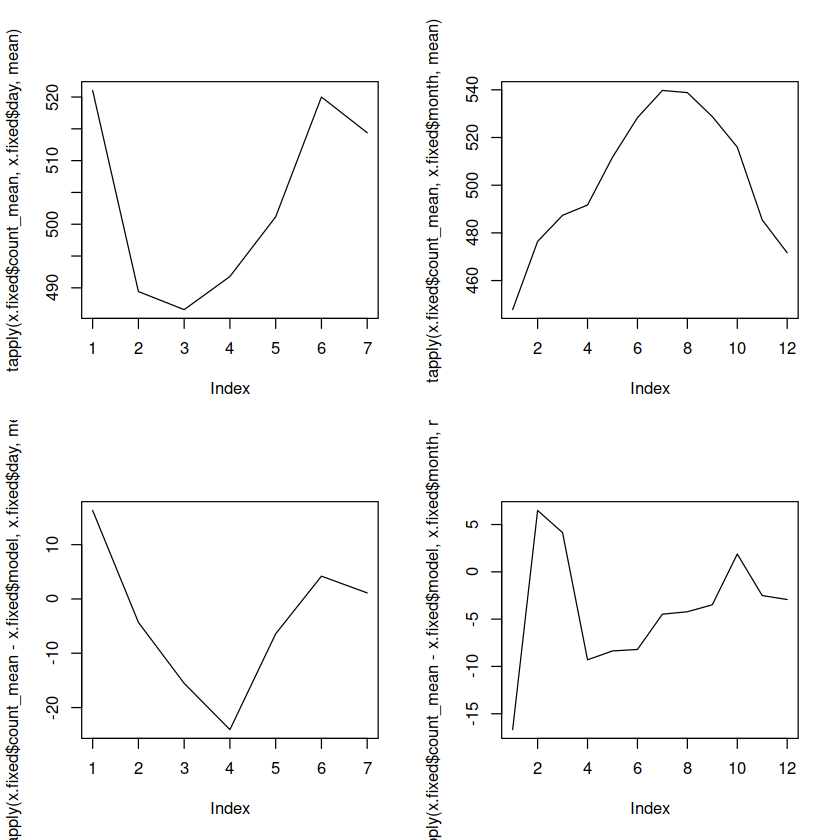

In [74]:
par(mfrow=c(2,2))
plot(tapply(x.fixed$count_mean, x.fixed$day, mean), type="l")
plot(tapply(x.fixed$count_mean, x.fixed$month, mean), type="l")
plot(tapply(x.fixed$count_mean - x.fixed$model, x.fixed$day, mean), type="l")
plot(tapply(x.fixed$count_mean - x.fixed$model, x.fixed$month, mean), type="l")

In [75]:
write.csv(x.fixed, "count_mean_sa_2016-2018.csv", row.names=F, quote=F)